<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


<AxesSubplot:>

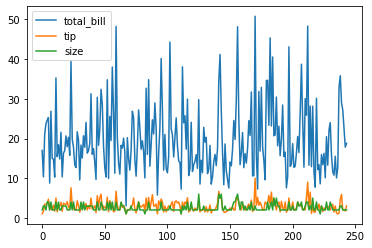

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
df = pd.read_csv('tips.csv')
df.head()
df.info()
df.columns
df.total_bill.max()
%matplotlib inline
df.plot()

<AxesSubplot:ylabel='Frequency'>

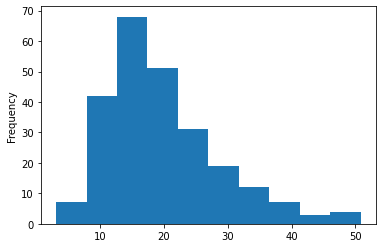

In [7]:
df['total_bill'].plot(kind = 'hist')



<AxesSubplot:title={'center':'Общая сумма счёта'}, ylabel='Frequency'>

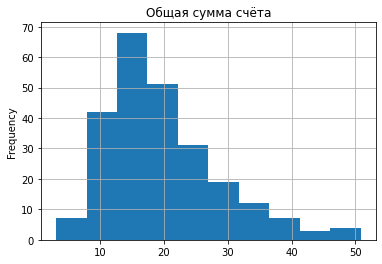

In [8]:
df['total_bill'].plot(kind = 'hist', grid = True, title = 'Общая сумма счёта')


<AxesSubplot:title={'center':'Количество посетителей по дням'}>

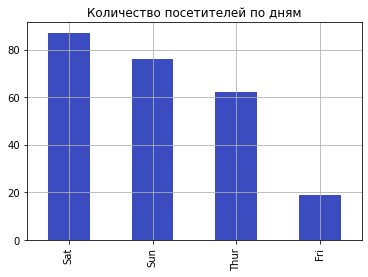

In [12]:
df['day'].value_counts().plot(kind = 'bar',
                              grid = True,
                              colormap = 'coolwarm',
                              title = 'Количество посетителей по дням')



array([<AxesSubplot:title={'center':'Общая сумма счёта'}, ylabel='Frequency'>,
       <AxesSubplot:title={'center':'Сумма чаевых'}, ylabel='Frequency'>],
      dtype=object)

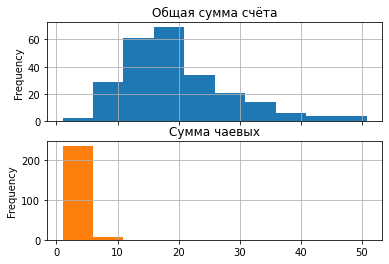

In [13]:
df[['total_bill', 'tip']].plot(kind = 'hist',
                               grid = True,
                               subplots = True,
                               title = ['Общая сумма счёта', 'Сумма чаевых'],
                               legend = False)

<AxesSubplot:title={'center':'Общая сумма счёта Vs сумма чаевых'}, xlabel='total_bill', ylabel='tip'>

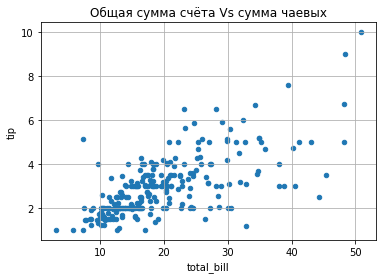

In [14]:
df.plot(x = 'total_bill',
        y = 'tip',
        kind = 'scatter',
        grid = True,
        title = 'Общая сумма счёта Vs сумма чаевых')

<AxesSubplot:xlabel='day'>

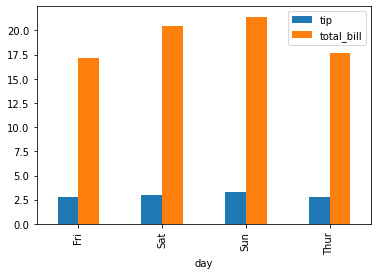

In [17]:
df.pivot_table(values = ['total_bill', 'tip'],
               index = 'day',
               aggfunc = 'mean').plot(kind = 'bar')

<AxesSubplot:xlabel='sex,smoker'>

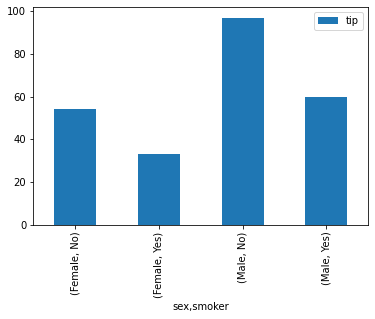

In [18]:
df.pivot_table(values = 'tip', index = ['sex', 'smoker'], aggfunc = 'count').plot(kind = 'bar')



(array([ 7., 42., 68., 51., 31., 19., 12.,  7.,  3.,  4.]),
 array([ 3.07 ,  7.844, 12.618, 17.392, 22.166, 26.94 , 31.714, 36.488,
        41.262, 46.036, 50.81 ]),
 <BarContainer object of 10 artists>)

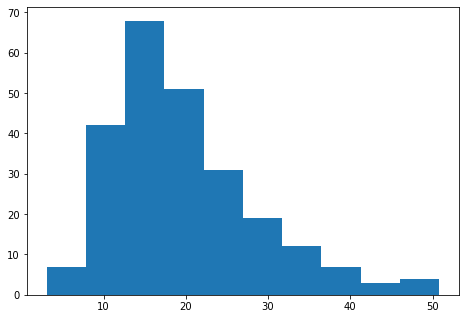

In [22]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.hist(df['total_bill'])

Text(0.5, 0, 'Сумма заказа, USD')

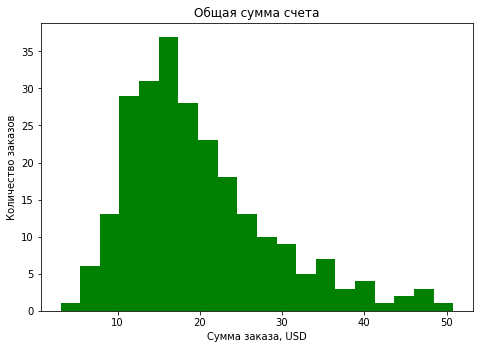

In [23]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.hist(df['total_bill'], bins = 20, color = 'green')
axes.set_title('Общая сумма счета')
axes.set_ylabel('Количество заказов')
axes.set_xlabel('Сумма заказа, USD')

Text(0, 0.5, 'Размер чаевых')

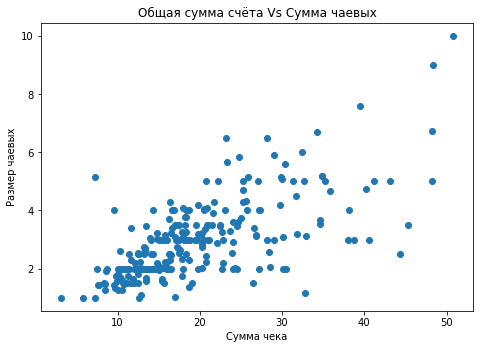

In [24]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.scatter(x = df['total_bill'], y = df['tip'], marker = 'o')
axes.set_title('Общая сумма счёта Vs Cумма чаевых')
axes.set_xlabel('Сумма чека')
axes.set_ylabel('Размер чаевых')

<BarContainer object of 4 artists>

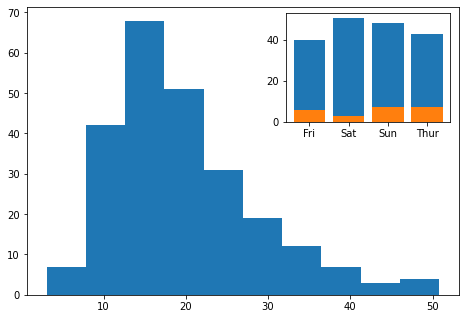

In [28]:
bills_per_day = df.groupby(by = 'day')['total_bill'].agg(['min','max']).reset_index()

fig = plt.figure()
main_axes = fig.add_axes([0, 0, 1, 1])
main_axes.hist(df['total_bill'])
insert_axes = fig.add_axes([0.6, 0.6, 0.38, 0.38])
insert_axes.bar(x = bills_per_day['day'], height = bills_per_day['max'])
insert_axes.bar(x = bills_per_day['day'], height = bills_per_day['min'])


<BarContainer object of 4 artists>

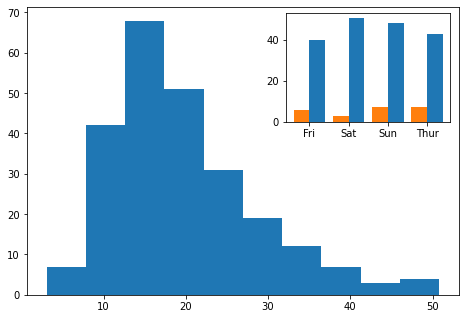

In [29]:
fig = plt.figure()
main_axes = fig.add_axes([0, 0, 1, 1])
main_axes.hist(df['total_bill'])
insert_axes = fig.add_axes([0.6, 0.6, 0.38, 0.38])
insert_axes.bar(x = bills_per_day['day'], height = bills_per_day['max'],
                width = 0.4, align = 'edge')
insert_axes.bar(x = bills_per_day['day'], height = bills_per_day['min'],
                width = -0.4, align = 'edge')

(<Figure size 864x288 with 3 Axes>,
 array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object))

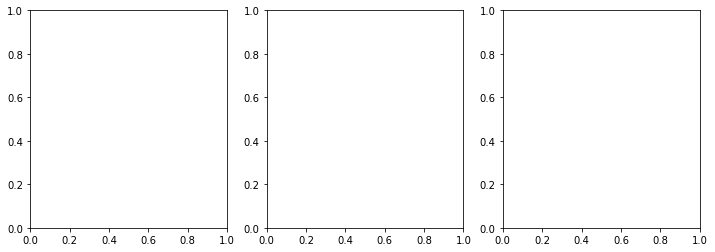

In [35]:
plt.subplots(1, 3, figsize=(12,4))

In [37]:
x = np.linspace(start=-3., stop=3., num=1000)
y1 = np.exp(x)

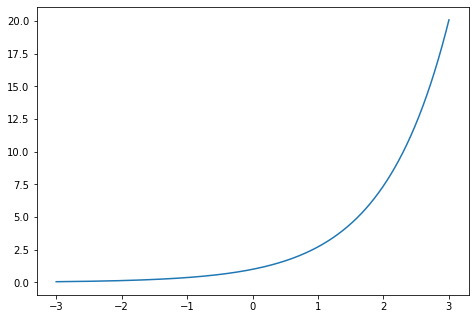

In [38]:
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
axes.plot(x, y1)

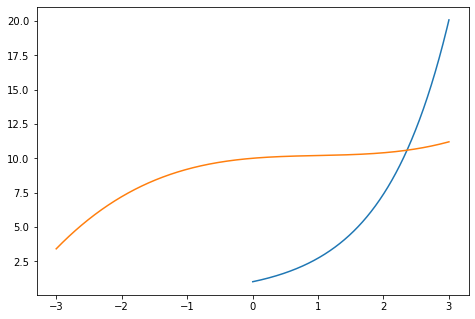

In [39]:
y2 = 10 + 0.4*x - 0.3*x**2 + 0.1*x**3

fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
axes.plot(x[500:], y1[500:])
axes.plot(x, y2)

In [52]:
import warnings; warnings.simplefilter('ignore')
